In [1]:
import numpy as npp
import cv2
import matplotlib.pyplot as plt
%matplotlib qt

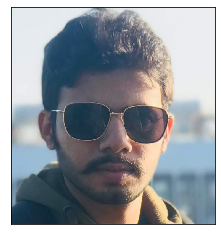

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('my_face.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
img_test = cv2.imread('my_face.jpg')
cap = cv2.VideoCapture(0)
while (cap.isOpened()):
    #cap.isOpened()
    ret, img  = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (fx, fy, fw, fh) in faces:
        cv2.rectangle(img, (fx, fy), (fx+fw, fy+fh), (255, 0, 0), 2)
        roi_gray = gray [fy:fy+fh, fx:fx+fw]
        roi_color = img [fy:fy+fh, fx:fx+fw]
        
        eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
    cv2.imshow('img', img)
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.show()           
               
   
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
#plt.show()